In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

# Project for UTM conversion (Universal Traverse Mercator Projection) https://github.com/Turbo87/utm
import utm

pd.set_option('display.max_columns', 500)

In [138]:
salem_demand_raw = pd.read_csv('inputs/salem_demand.csv')
salem_demand_raw.columns = [c.replace(' ', '_') for c in salem_demand_raw.columns]
salem_demand_df = salem_demand_raw.drop(columns = ['Unnamed:_0'])

In [3]:
salem_demand_df

,station_id,Number,Name,Latitude,Longitude,Total_docks,count,demand
0,516,T32001,Salem Ferry Landing,42.521893,-70.880691,11,1125,102.272727
1,517,T32002,Salem Willows Park,42.534669,-70.870214,15,2002,133.466667
2,518,T32003,Shetland Park - Congress at Peabody St,42.518368,-70.889524,11,1699,154.454545
3,519,T32004,Mayor Salvo Path at Mill St,42.518035,-70.895701,11,2664,242.181818
4,520,T32005,Salem MBTA - Washington at Federal St,42.523452,-70.896111,13,2947,226.692308
5,521,T32006,Lafayette at Leach St,42.511428,-70.891833,11,1114,101.272727
6,562,T32008,Hawthorne Boulevard,42.522371,-70.890333,9,2669,296.555556
7,570,T32009,Salem State University - North Campus,42.503332,-70.891444,11,779,70.818182
8,571,T32010,Forest River Park,42.506395,-70.886930,11,530,48.181818
9,572,T32011,Essex St at Dalton Parkway,42.516223,-70.905535,11,257,23.363636


In [139]:
ball_size = 0.1
salem_demand_df["Size"] = ball_size * np.ones(len(salem_demand_df))

In [51]:
salem_demand_df

,station_id,Number,Name,Latitude,Longitude,Total_docks,count,demand,Colors,Size
0,516,T32001,Salem Ferry Landing,42.521893,-70.880691,11,1125,102.272727,fuchsia,0.1
1,517,T32002,Salem Willows Park,42.534669,-70.870214,15,2002,133.466667,fuchsia,0.1
2,518,T32003,Shetland Park - Congress at Peabody St,42.518368,-70.889524,11,1699,154.454545,fuchsia,0.1
3,519,T32004,Mayor Salvo Path at Mill St,42.518035,-70.895701,11,2664,242.181818,fuchsia,0.1
4,520,T32005,Salem MBTA - Washington at Federal St,42.523452,-70.896111,13,2947,226.692308,fuchsia,0.1
5,521,T32006,Lafayette at Leach St,42.511428,-70.891833,11,1114,101.272727,fuchsia,0.1
6,562,T32008,Hawthorne Boulevard,42.522371,-70.890333,9,2669,296.555556,fuchsia,0.1
7,570,T32009,Salem State University - North Campus,42.503332,-70.891444,11,779,70.818182,fuchsia,0.1
8,571,T32010,Forest River Park,42.506395,-70.886930,11,530,48.181818,fuchsia,0.1
9,572,T32011,Essex St at Dalton Parkway,42.516223,-70.905535,11,257,23.363636,fuchsia,0.1


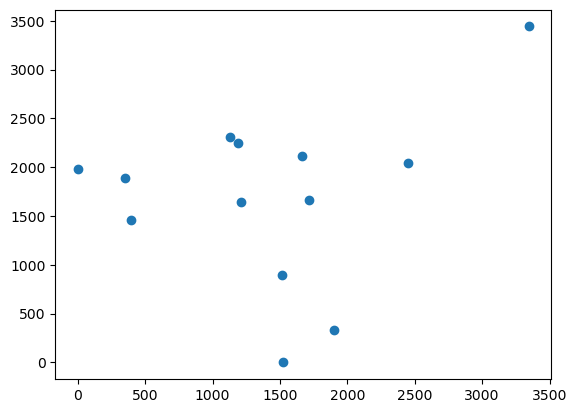

In [140]:
def add_x_y(input_df):
    if "x" in input_df.keys() or "y" in input_df.keys():
        return input_df
    
    def rule(row):
        x, y, zone_number, zone_letter = utm.from_latlon(row["Latitude"], row["Longitude"])
        return pd.Series({"x": x, "y": y, "zone_number": zone_number, "zone_letter": zone_letter})
    output_df = input_df.merge(input_df.apply(rule, axis=1), left_index=True, right_index=True)
    
    def rule2(row):
        xnew, ynew = row["x"]-output_df["x"].min(),row["y"]-output_df["y"].min()
        return pd.Series({"xnew": xnew, "ynew": ynew})
    output_df = output_df.merge(output_df.apply(rule2, axis=1), left_index=True, right_index=True)
    return output_df
    
salem_demand_df = add_x_y(salem_demand_df)
x_list = salem_demand_df["xnew"].values
y_list = salem_demand_df["ynew"].values
plt.scatter(x_list, y_list)
plt.show()

In [141]:
# Plot a map of the stations
fig = px.scatter_mapbox(salem_stations, lat="Latitude", lon="Longitude", hover_name="Name", hover_data=["Number", "Total_docks", "Deployment_Year", "District"], color_discrete_sequence=["fuchsia"], zoom=12, height=900, size=salem_stations["Size"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [169]:
#candidates_df = pd.read_csv('inputs/candidate_stations.csv', header=0)
candidates_df = pd.read_csv('inputs/candidate_address.csv', header=0)
candidates_df["Latitude"] = candidates_df["lat"]
candidates_df["Longitude"] = candidates_df["lng"]

,Address,Coordinates,lat,lng,Latitude,Longitude
0,"90 Willson St, Salem, MA 01970, USA","(42.507436, -70.907488)",42.507436,-70.907488,42.507436,-70.907488
1,"29 Horton St, Salem, MA 01970, USA","(42.507694, -70.9046388)",42.507694,-70.904639,42.507694,-70.904639
2,"2 Laurent Rd, Salem, MA 01970, USA","(42.5076135, -70.90245589999999)",42.507613,-70.902456,42.507613,-70.902456
3,"13 Brooks St, Salem, MA 01970, USA","(42.5076347, -70.89957629999999)",42.507635,-70.899576,42.507635,-70.899576
4,"3 Broadway, Salem, MA 01970, USA","(42.5075076, -70.89699960000002)",42.507508,-70.897000,42.507508,-70.897000
...,...,...,...,...,...,...
104,"24 Saunders St, Salem, MA 01970, USA","(42.529489, -70.89210299999999)",42.529489,-70.892103,42.529489,-70.892103
105,"89 Bridge St, Salem, MA 01970, USA","(42.5294607, -70.889544)",42.529461,-70.889544,42.529461,-70.889544
106,"Collins Cove Playground, 32 Collins St, Salem,...","(42.5296097, -70.8868734)",42.529610,-70.886873,42.529610,-70.886873
107,"13 Settlers Way, Salem, MA 01970, USA","(42.52943190000001, -70.8813462)",42.529432,-70.881346,42.529432,-70.881346


In [143]:
attractions_df = pd.read_csv('inputs/attractions_locations.csv', header=0)
attractions_df
attractions_weights = pd.read_csv('inputs/attractions_weights.csv', header=0).drop(columns=['Attraction','Index'])
attractions_weights

attractions_df = pd.concat([attractions_df, attractions_weights], axis=1)
attractions_df

,Index,Attraction,Latitude,Longitude,Google Reviews
0,1,Peabody Essex Museum,42.522718,-70.891017,3179
1,2,Salem Witch Museum,42.525314,-70.890798,8542
2,3,The Satanic Temple at Salem Art gallery,42.532459,-70.889641,151
3,4,Bewitched Statue,42.523167,-70.895331,354
4,5,Witch House,42.523108,-70.898031,3028
5,6,Salem Maritime National Historic Site,42.522753,-70.886814,1657
6,7,The House of the Seven Gables,42.523021,-70.880399,3369
7,8,Salem Willows Park,42.536436,-70.870417,2968
8,9,Witch Dungeon Museum,42.523589,-70.896128,1645
9,10,Salem Willows Arcade,42.535313,-70.868533,221


In [153]:
pd.concat([candidates_df,salem_demand_df,attractions_df])

,Address,Coordinates,lat,lng,Latitude,Longitude,index,Group,Size,station_id,Number,Name,Total_docks,count,demand,x,y,zone_number,zone_letter,xnew,ynew,norm,Index,Attraction,Google Reviews
0,"90 Willson St, Salem, MA 01970, USA","(42.507436, -70.907488)",42.507436,-70.907488,42.507436,-70.907488,0.0,Not Chosen Stations,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"29 Horton St, Salem, MA 01970, USA","(42.507694, -70.9046388)",42.507694,-70.904639,42.507694,-70.904639,1.0,Not Chosen Stations,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"2 Laurent Rd, Salem, MA 01970, USA","(42.5076135, -70.90245589999999)",42.507613,-70.902456,42.507613,-70.902456,2.0,Not Chosen Stations,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"13 Brooks St, Salem, MA 01970, USA","(42.5076347, -70.89957629999999)",42.507635,-70.899576,42.507635,-70.899576,3.0,Not Chosen Stations,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"3 Broadway, Salem, MA 01970, USA","(42.5075076, -70.89699960000002)",42.507508,-70.897000,42.507508,-70.897000,4.0,Not Chosen Stations,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,NaN,NaN,NaN,NaN,42.521777,-70.890257,NaN,Attractions,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,New England Pirate Museum,292.0
18,NaN,NaN,NaN,NaN,42.522066,-70.889778,NaN,Attractions,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,Salem Witch Trials Memorial,2091.0
19,NaN,NaN,NaN,NaN,42.523265,-70.893021,NaN,Attractions,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,witch city mall,1339.0
20,NaN,NaN,NaN,NaN,42.520705,-70.901737,NaN,Attractions,0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,Historic New England Phillips House,74.0


Standardize weights

In [155]:
#standardize attraction and demand weights
#attraction_weights_raw = pd.read_csv('inputs/attractions_weights.csv')
#attraction_weights = attraction_weights_raw["Google Reviews"]
attraction_weights = attractions_df["Google Reviews"]

demand_weights = salem_demand_df["demand"]

attractions_df["log"] = np.log10(attraction_weights)
attractions_df["norm"] = (attractions_df["log"] - min(attractions_df["log"]))/(max(attractions_df["log"]) - min(attractions_df["log"]))
attractions_df

#salem_demand_df.describe()
salem_demand_df["norm"] = (demand_weights - min(demand_weights))/(max(demand_weights) - min(demand_weights))
salem_demand_df

#first see distributions
#demand_weights.hist()
#attraction_weights.hist()

#attraction_weights.plot(kind='hist', logx=True, bins=10)

#write to csv
#attractions_df.to_csv('inputs/standardized_attractions_weights.csv')
#salem_demand_df.to_csv('inputs/standardized_salem_demand.csv')

,station_id,Number,Name,Latitude,Longitude,Total_docks,count,demand,Size,x,y,zone_number,zone_letter,xnew,ynew,norm,Group
0,516,T32001,Salem Ferry Landing,42.521893,-70.880691,11,1125,102.272727,0.1,345522.357606,4.709438e+06,19,T,2453.337725,2041.414775,0.334395,Existing Stations
1,517,T32002,Salem Willows Park,42.534669,-70.870214,15,2002,133.466667,0.1,346414.242823,4.710838e+06,19,T,3345.222942,3441.101549,0.441264,Existing Stations
2,518,T32003,Shetland Park - Congress at Peabody St,42.518368,-70.889524,11,1699,154.454545,0.1,344788.114754,4.709063e+06,19,T,1719.094873,1666.127317,0.513167,Existing Stations
3,519,T32004,Mayor Salvo Path at Mill St,42.518035,-70.895701,11,2664,242.181818,0.1,344279.862496,4.709037e+06,19,T,1210.842615,1640.517085,0.813718,Existing Stations
4,520,T32005,Salem MBTA - Washington at Federal St,42.523452,-70.896111,13,2947,226.692308,0.1,344259.610632,4.709639e+06,19,T,1190.590751,2242.819490,0.760651,Existing Stations
5,521,T32006,Lafayette at Leach St,42.511428,-70.891833,11,1114,101.272727,0.1,344581.206188,4.708296e+06,19,T,1512.186307,899.708322,0.330969,Existing Stations
6,562,T32008,Hawthorne Boulevard,42.522371,-70.890333,9,2669,296.555556,0.1,344731.536647,4.709509e+06,19,T,1662.516766,2112.178240,1.000000,Existing Stations
7,570,T32009,Salem State University - North Campus,42.503332,-70.891444,11,779,70.818182,0.1,344593.105338,4.707396e+06,19,T,1524.085457,0.000000,0.226633,Existing Stations
8,571,T32010,Forest River Park,42.506395,-70.886930,11,530,48.181818,0.1,344971.572526,4.707728e+06,19,T,1902.552645,331.862199,0.149081,Existing Stations
9,572,T32011,Essex St at Dalton Parkway,42.516223,-70.905535,11,257,23.363636,0.1,343467.488614,4.708854e+06,19,T,398.468733,1457.399937,0.064055,Existing Stations


Standardize distances

mean 1935.2420606916019
std 948.201199349726
1.1972586213454992
0.2006853446636252


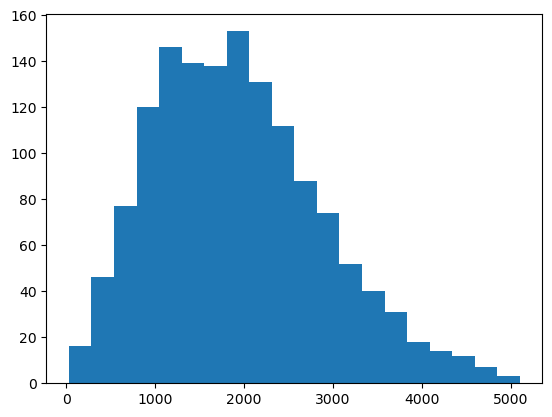

In [229]:
attraction_distances = pd.read_csv('inputs/candidate_attraction_distance.csv', header=0)
existing_distances_raw = pd.read_csv('inputs/candidate_existing_distance.csv', header=0)
existing_distances = existing_distances_raw.reindex(sorted(existing_distances_raw.columns), axis=1)

###constraint threshold
threshold = 800

#plot histograms
#plt.hist(attraction_distances.values.flatten()) #normal distribution
#plt.hist(existing_distances.values.flatten()) #normal distribution

###existing distances
existing_distances_flat = existing_distances.values.flatten()

#compute new threshold
print("mean",existing_distances_flat.mean())
print("std",existing_distances_flat.std())
threshold_mult = (existing_distances_flat.mean() - threshold) / existing_distances_flat.std()
print(threshold_mult)
print((2-threshold_mult)/4)

#plt.hist(existing_distances.values.flatten(), bins=20)

existing_distances_stand = (existing_distances - existing_distances_flat.mean())/(existing_distances_flat.std())
existing_distances_stand -= existing_distances_stand.min()
existing_distances_stand /= 4 #account for only 2 left standard deviations and 2 right standard deviations
existing_distances_stand = np.clip(existing_distances_stand,0,1)

#plt.hist(existing_distances_stand.values.flatten(), bins=20)

###attraction distances
attraction_distances_flat = attraction_distances.values.flatten()

attraction_distances_stand = (attraction_distances - attraction_distances_flat.mean())/(attraction_distances_flat.std())
attraction_distances_stand -= attraction_distances_stand.min()
attraction_distances_stand /= 4 #account for only 2 left standard deviations and 2 right standard deviations
attraction_distances_stand = np.clip(attraction_distances_stand,0,1)

#plt.hist(attraction_distances_stand.values.flatten())

#write to csv
#attraction_distances_stand.to_csv('inputs/standardized_attractions_distance.csv')
#existing_distances_stand.to_csv('inputs/standardized_existing_distance.csv')

Post optimization plotting

In [258]:
salem_demand_df['Group'] = ["Existing Stations" for _ in range(len(salem_demand_df))]
attractions_df['Group'] = ["Attractions" for _ in range(len(attractions_df))]

candidates_df['index'] = np.arange(len(candidates_df))
stations_chosen = (38,46,47,53,79,86,96,97,104,105)
candidates_df['Group'] = np.where(candidates_df['index'].isin(stations_chosen), "Chosen Stations", "Not Chosen Stations")
candidates_df["Size"] = ball_size * np.ones(len(candidates_df))

attractions_df['Size'] = ball_size * np.ones(len(attractions_df))

# Plot a map of the potential stations
fig = px.scatter_mapbox(pd.concat([candidates_df,salem_demand_df,attractions_df]), lat="Latitude", lon="Longitude", hover_name = "norm", color="Group", zoom=12, height=900, size="Size", size_max=15)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(legend = dict(font = dict(size = 20, color = "black")),
                  legend_title = dict(font = dict(size = 20, color = "Black")))
fig.show()

In [170]:
candidates_df.iloc[37]

Address        7 Florence St, Salem, MA 01970, USA
Coordinates              (42.5156523, -70.8945172)
lat                                      42.515652
lng                                     -70.894517
Latitude                                 42.515652
Longitude                               -70.894517
Name: 37, dtype: object